<a href="https://colab.research.google.com/github/Yashwant-Code98/Bank-Defaulter-Analysis/blob/master/Covid_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
covid = pd.read_csv("covid.csv")

In [22]:
covid.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [27]:
covid.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [23]:
covid.isnull().sum()

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [24]:
covid = covid[["Date","Daily Confirmed"]]

In [25]:
covid.head()

,Date,Daily Confirmed
0,30-Jan,1
1,31-Jan,0
2,01-Feb,0
3,02-Feb,1
4,03-Feb,1


In [29]:
covid = pd.read_csv("covid.csv",parse_dates=["Date"])

In [31]:
covid.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [32]:
covid = pd.read_csv("covid.csv",parse_dates=["Date"],index_col=["Date"])

In [33]:
covid.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
30-Jan,1,1,0,0,0,0
31-Jan,0,1,0,0,0,0
01-Feb,0,1,0,0,0,0
02-Feb,1,2,0,0,0,0
03-Feb,1,3,0,0,0,0


In [34]:
covid["03-Mar":"01-Apr"]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
03-Mar,1,6,0,3,0,0
04-Mar,22,28,0,3,0,0
05-Mar,2,30,0,3,0,0
06-Mar,1,31,0,3,0,0
07-Mar,3,34,0,3,0,0
08-Mar,5,39,0,3,0,0
09-Mar,9,48,0,3,0,0
10-Mar,15,63,1,4,0,0
11-Mar,8,71,0,4,0,0


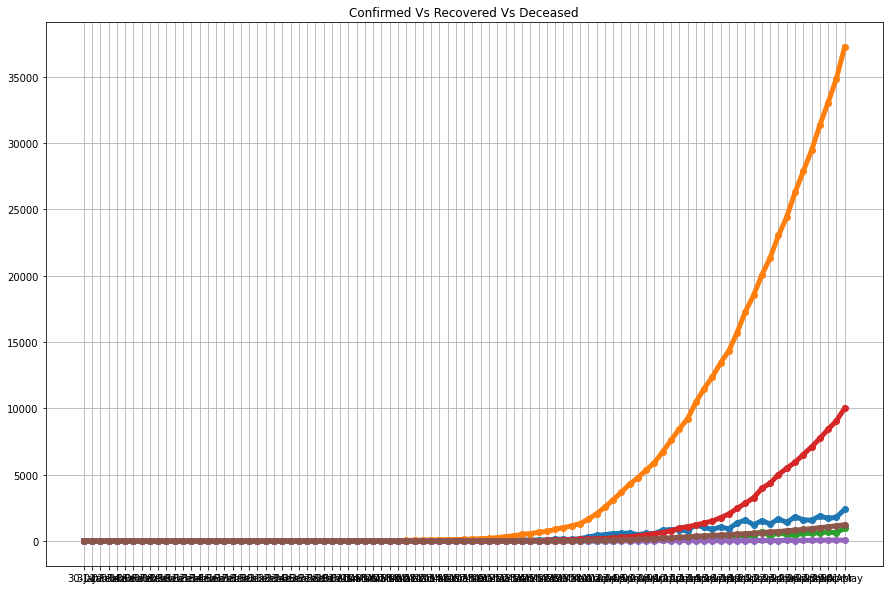

In [46]:
plt.plot(covid, linewidth=5,marker="o")
plt.title("Confirmed Vs Recovered Vs Deceased")
plt.grid(True)
plt.show()

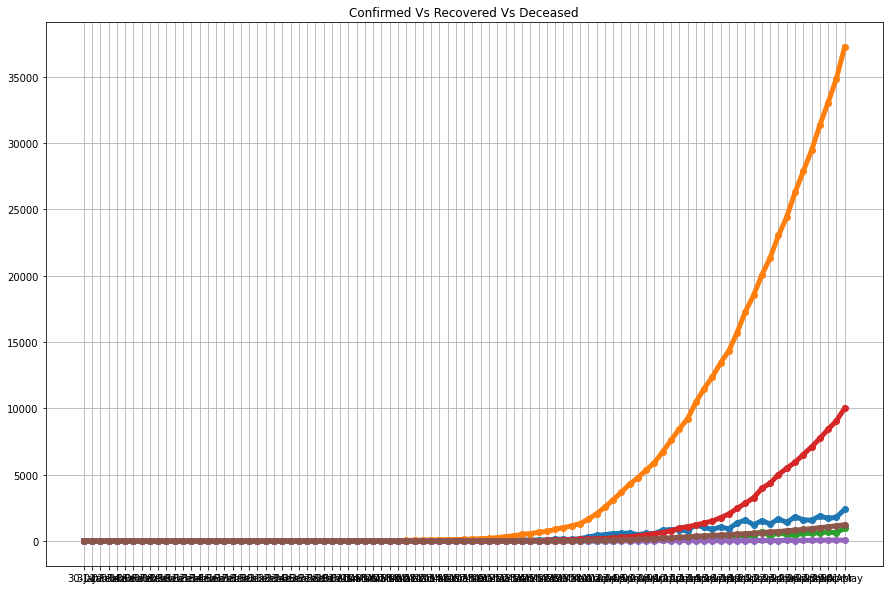

In [49]:
from pylab import rcParams
rcParams["figure.figsize"]= 15,10
plt.title("Confirmed Vs Recovered Vs Deceased")
plt.plot(covid,linewidth=5,marker="o")
plt.grid(True)
plt.show()

In [55]:
covid_log = covid.copy()

In [58]:
import numpy as np

In [60]:
covid_log["Daily Confirmed"] = np.log(covid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


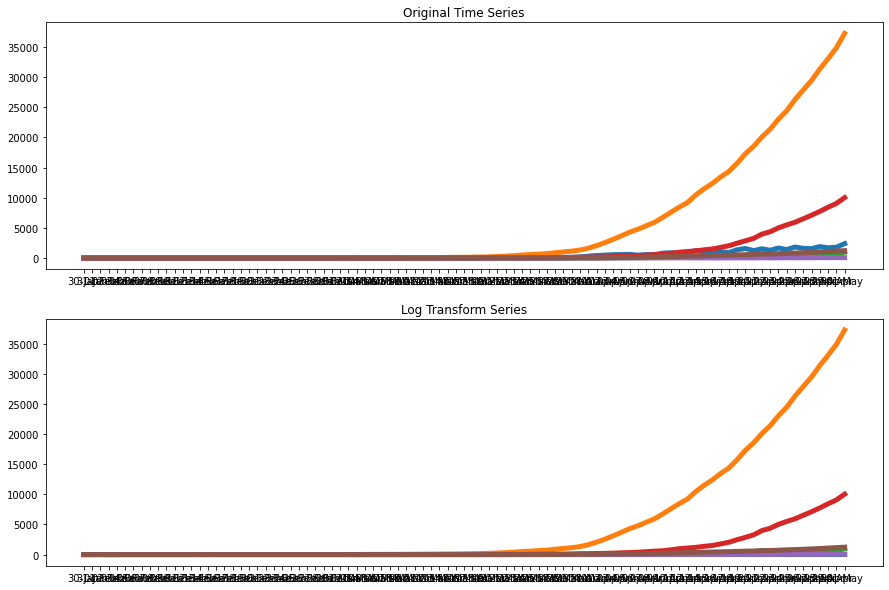

In [67]:
plt.subplot(2,1,1)
plt.plot(covid, linewidth=5)
plt.title("Original Time Series")
 
plt.subplot(2,1,2)
plt.plot(covid_log, linewidth=5)
plt.title("Log Transform Series")
plt.show()